In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from unidecode import unidecode

In [317]:
# dfm=pd.read_csv('./datasets/FINAL_CLEAN2.txt')
dfm=pd.read_csv('./datasets/Final_DIVAR.txt')

In [318]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36746 entries, 0 to 36745
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           36746 non-null  int64  
 1   Unnamed: 0             36746 non-null  int64  
 2   construct_year         36746 non-null  int64  
 3   number_of_room         36746 non-null  int64  
 4   size_metre             36746 non-null  int64  
 5   Elevator               36746 non-null  int64  
 6   Parking                36746 non-null  int64  
 7   Cage                   36746 non-null  int64  
 8   Balcon                 36746 non-null  int64  
 9   main_neighbourhood     36746 non-null  object 
 10  price_perMetre_Tooman  36743 non-null  float64
 11  floor                  36008 non-null  float64
dtypes: float64(2), int64(9), object(1)
memory usage: 3.4+ MB


In [319]:
mainmahale=dfm.main_neighbourhood.value_counts().head(350).index
dfm=dfm[dfm.main_neighbourhood.isin(mainmahale)]

In [320]:
mainmahale.shape

(350,)

In [321]:
dfm.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'construct_year', 'number_of_room',
       'size_metre', 'Elevator', 'Parking', 'Cage', 'Balcon',
       'main_neighbourhood', 'price_perMetre_Tooman', 'floor'],
      dtype='object')

In [322]:
df=dfm.loc[:,['construct_year', 'number_of_room', 'size_metre',
       'Elevator', 'Parking', 'Cage', 'Balcon','floor','main_neighbourhood', 'price_perMetre_Tooman']]
df.rename(columns={ 'main_neighbourhood' : 'ne' ,'price_perMetre_Tooman':'price'},inplace=True)
df.price=df.price/1000000
df=df[pd.to_numeric(df['floor'], errors='coerce').notnull()] 


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32738 entries, 0 to 36744
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   construct_year  32738 non-null  int64  
 1   number_of_room  32738 non-null  int64  
 2   size_metre      32738 non-null  int64  
 3   Elevator        32738 non-null  int64  
 4   Parking         32738 non-null  int64  
 5   Cage            32738 non-null  int64  
 6   Balcon          32738 non-null  int64  
 7   floor           32738 non-null  float64
 8   ne              32738 non-null  object 
 9   price           32738 non-null  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 2.7+ MB


### DAta clean

In [241]:
def myfun2(x):
    try: 
        tt=x.replace("٬","")
        tt2=unidecode(tt)
        tt3=int(tt2)/1000000
        return(tt3)
               
    except:
        return(x)
col='price'
df[col]=df['price'].apply(lambda x: myfun2(x)) 
df[col]=pd.to_numeric(df[col], errors='coerce')
# df[col]

In [242]:
def myfun(x):
    try: 
       
        return(int(unidecode(x)))
    except:
        return('')
col='floor'
df[col]=df[col].apply(lambda x: myfun(x)) 
df=df[pd.to_numeric(df['floor'], errors='coerce').notnull()] 
df['floor']=df['floor'].astype('int') 

In [276]:
for col in ['construct_year', 'number_of_room', 'size_metre',
       'Elevator', 'Parking', 'Cage', 'Balcon']:
    print(col)
    df[col]=df[col].astype('int') 



construct_year
number_of_room
size_metre
Elevator
Parking
Cage
Balcon


### Transform address

In [326]:
df2 = pd.get_dummies(df, columns = ['ne'])

In [327]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32738 entries, 0 to 36744
Columns: 359 entries, construct_year to ne_یوسف‌آباد، خیابان مهرام (مدبر)
dtypes: float64(2), int64(7), uint8(350)
memory usage: 13.4 MB


In [328]:
df2.shape

(32738, 359)

In [329]:
df=df2


### remove outliers

In [330]:
for col in ['construct_year', 'number_of_room', 'size_metre',
       'Elevator', 'Parking', 'Cage', 'Balcon' , 'floor']:
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)

    df_filtered = df[(df[col] < q_hi) & (df[col] > q_low)]

col='price'
q_low = df[col].quantile(0.04)
q_hi  = df[col].quantile(0.96)
df_filtered = df[(df[col] < q_hi) & (df[col] > q_low)]
    
df_filtered.shape

(30092, 359)

In [331]:
df=df_filtered

In [332]:
df.describe()

,construct_year,number_of_room,size_metre,Elevator,Parking,Cage,Balcon,floor,price,ne_آبشار,...,ne_گرگان,ne_گمرک,ne_گیشا (کوی نصر),ne_یاخچی‌آباد,ne_یافت‌آباد,ne_یوسف‌آباد,ne_یوسف‌آباد، خیابان اسدآبادی (خیابان ولیعصر),ne_یوسف‌آباد، خیابان اسدآبادی (یوسف آباد) (خیابان ولیعصر),ne_یوسف‌آباد، خیابان جهان‌آرا,ne_یوسف‌آباد، خیابان مهرام (مدبر)
count,30092.000000,30092.000000,30092.000000,30092.000000,30092.000000,30092.000000,30092.0,30092.000000,30092.000000,30092.000000,...,30092.000000,30092.000000,30092.000000,30092.000000,30092.000000,30092.000000,30092.000000,30092.000000,30092.000000,30092.000000
mean,1392.475442,2.236641,119.364515,0.831616,0.884421,0.944204,0.0,3.420942,76.274547,0.000299,...,0.001097,0.001529,0.011598,0.000199,0.000997,0.013625,0.000199,0.000332,0.000731,0.000366
std,7.901231,0.740405,128.160184,0.374213,0.319725,0.229530,0.0,2.916043,32.489393,0.017292,...,0.033098,0.039069,0.107068,0.014119,0.031559,0.115930,0.014119,0.018227,0.027029,0.019116
min,1369.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.0,0.000000,20.769000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1386.000000,2.000000,77.000000,1.000000,1.000000,1.000000,0.0,2.000000,52.252000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1394.000000,2.000000,107.000000,1.000000,1.000000,1.000000,0.0,3.000000,71.428000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1400.000000,3.000000,140.000000,1.000000,1.000000,1.000000,0.0,4.000000,93.333000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1401.000000,4.000000,10000.000000,1.000000,1.000000,1.000000,0.0,30.000000,179.844000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### visual Analysis

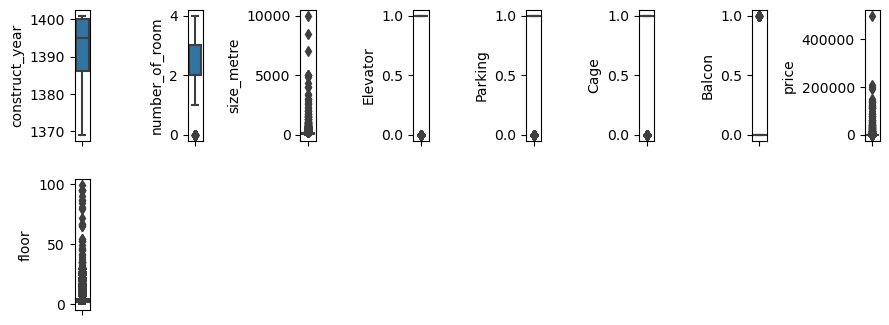

In [235]:
plt.figure(figsize=(9,5 ))
no=0
for col in df.columns:
    no+=1
    plt.subplot(3,8,no)
    plt.tight_layout()
    sns.boxplot(y=df[col])  

In [ ]:
plt.figure(figsize=(12, 5))
sns.pairplot(df)

In [ ]:
sns.scatterplot()

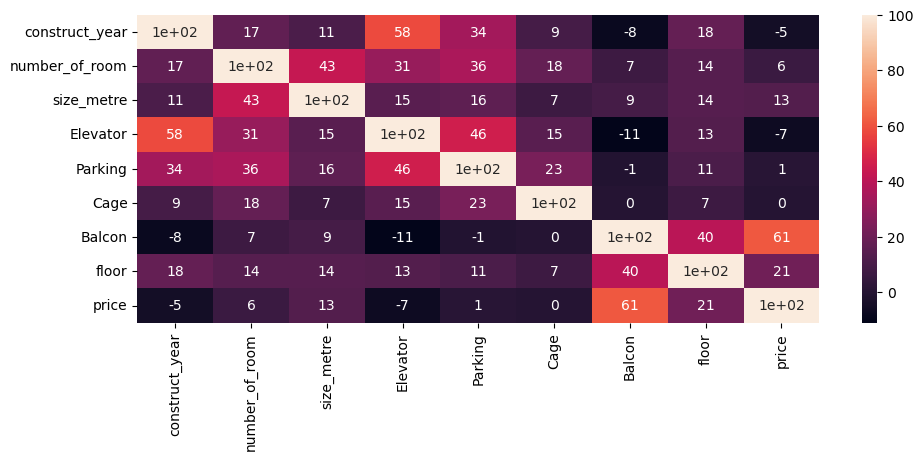

In [15]:
corr_date = df.corr().round(2)*100
fig = plt.figure(figsize =(11, 4)) 
# figsize=(11,1)
ax=sns.heatmap(corr_date, annot=True)
plt.xticks()
plt.show()

### Modelling

In [179]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor,LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math

In [333]:
X = df.loc[:,df.columns != 'price'].values
y = df.loc[:,'price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state=85, )

In [334]:
# model = make_pipeline(preprocessing.MinMaxScaler(),preprocessing.PolynomialFeatures(degree=3, include_bias=False), Ridge(alpha=5))
# model = make_pipeline(preprocessing.MinMaxScaler(),SGDRegressor(max_iter=10000, tol=1e-3))
model = make_pipeline(preprocessing.MinMaxScaler(),LinearRegression())

# SGDRegressor(max_iter=1000, tol=1e-3,penalty='l1'))
model.fit(X_train, y_train)
# print("SGD intercept: ", model[1].intercept_)
# print("SGD coef : ", model[1].coef_)
# print("iteration: ", model[1].n_iter_)
y_predict= model.predict(X_test)
print("R2: ", metrics.r2_score(y_test, y_predict))
print("MSE: ", metrics.mean_squared_error(y_test, y_predict))
print("MAE : ", metrics.mean_absolute_error(y_test, y_predict))
print("MAPE : ", metrics.mean_absolute_percentage_error(y_test, y_predict))
print("Error percent:     ","%.0f%%" %(100*math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["price"].mean()))
# "%.0f%%" %(100*accuracy) 

R2:  0.8000564755302211
MSE:  213.16641671182822
MAE :  10.374792124804427
MAPE :  0.14502308079236897
Error percent:      19%


### Some Analysis

In [375]:
dff=pd.concat( [pd.DataFrame(X_test),pd.Series(y_predict),pd.Series(y_test )],  axis=1)
dff=dff.iloc[:,[0,1,2,3,4,5,6,7,-2,-1]]
dff.columns=('year room metrage Elevator Parking Cage Balcon floor y_predict y_test').split()
dff['error']=dff.apply(lambda x: abs(x[-2]-x[-1]), axis=1)
# dff

In [376]:
dff.sort_values(by='error', ascending=False)

,year,room,metrage,Elevator,Parking,Cage,Balcon,floor,y_predict,y_test,error
2201,1369.0,2.0,93.0,0.0,0.0,1.0,0.0,1.0,9.540771,134.408,124.867229
7035,1401.0,3.0,144.0,1.0,1.0,1.0,0.0,11.0,148.113037,33.333,114.780037
6519,1401.0,3.0,140.0,1.0,1.0,1.0,0.0,15.0,46.016357,130.000,83.983643
5811,1384.0,3.0,165.0,1.0,1.0,1.0,0.0,4.0,95.380127,178.787,83.406873
2861,1401.0,4.0,8500.0,1.0,1.0,1.0,0.0,13.0,164.551270,82.352,82.199270
...,...,...,...,...,...,...,...,...,...,...,...
8489,1395.0,4.0,230.0,1.0,1.0,1.0,0.0,2.0,127.645264,127.652,0.006736
6437,1385.0,2.0,100.0,1.0,1.0,1.0,0.0,4.0,82.994385,83.000,0.005615
5788,1386.0,2.0,71.0,0.0,1.0,1.0,0.0,4.0,39.440918,39.436,0.004918
4236,1395.0,3.0,134.0,1.0,1.0,1.0,0.0,13.0,42.159424,42.164,0.004576


In [353]:
dff

,0,1,2,3,4,5,6,7,0,1,def
0,1401.0,3.0,124.0,1.0,1.0,1.0,0.0,3.0,76.006836,64.516,124.0
1,1401.0,2.0,80.0,1.0,1.0,1.0,0.0,1.0,61.244873,56.250,80.0
2,1394.0,2.0,103.0,1.0,1.0,1.0,0.0,4.0,51.026123,46.601,103.0
3,1401.0,3.0,200.0,1.0,1.0,1.0,0.0,3.0,146.598145,170.000,200.0
4,1397.0,2.0,112.0,1.0,1.0,1.0,0.0,2.0,92.049805,85.714,112.0
...,...,...,...,...,...,...,...,...,...,...,...
9023,1400.0,3.0,146.0,1.0,1.0,1.0,0.0,4.0,84.800781,70.205,146.0
9024,1389.0,2.0,115.0,1.0,1.0,1.0,0.0,1.0,80.070801,77.826,115.0
9025,1400.0,2.0,106.0,1.0,1.0,1.0,0.0,8.0,76.229980,90.000,106.0
9026,1378.0,1.0,43.0,0.0,0.0,1.0,0.0,3.0,18.503174,33.720,43.0


In [311]:
dff.sort_values(by='def')

KeyError: 'def'